In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
import sys

# Import the LJSimulator class
from LJSimulator import LJSimulator

# Set simulation parameters
N = 64               # Number of particles
Lx = Ly = 10.0       # Initial box dimensions
temperature = 1.0    # Initial temperature
dt = 0.01            # Time step
equilibrium_steps = 100  # Steps to discard until equilibrium
total_time = 50.0    # Total simulation time (units)
phase_change_time = 10.0  # Time to resize box
anim_interval = 5    # Save position every N steps for animation

# Derived parameters
num_steps = int(total_time / dt)
phase_change_step = int(phase_change_time / dt)

# Create the simulation
sim = LJSimulator(N=N, Lx=Lx, Ly=Ly, temperature=temperature, dt=dt,
                  lattice_type='triangular', snapshot_interval=anim_interval)

print(f"Starting simulation with {N} particles for {num_steps} steps")
start_time = time.time()

# Step 1: Discard initial steps to reach equilibrium
print(f"Discarding first {equilibrium_steps} steps to reach equilibrium...")
for i in range(equilibrium_steps):
    sim.step()

# Step 2: Clear history after reaching equilibrium
sim.clear_history()

# Step 3: Main simulation loop
print(f"Running main simulation for {num_steps} steps...")
update_interval = max(1, num_steps // 20)  # Update every 5%

for i in range(num_steps):
    current_time = i * dt

    # Check if it's time to resize the box
    if i == phase_change_step:
        sim.set_box_size(Lx / 2, Ly / 2)
        print(f"\nPhase change at time {current_time:.2f} (Step {i}): Resized box to Lx={Lx/2}, Ly={Ly/2}")

    sim.step()

    # Print progress updates
    if (i+1) % update_interval == 0 or i == num_steps-1:
        progress = (i+1) / num_steps * 100
        elapsed = time.time() - start_time
        eta = elapsed / (i+1) * (num_steps - i - 1)

        sys.stdout.write(f"\rProgress: {progress:.1f}% | Step: {i+1}/{num_steps} | ")
        sys.stdout.write(f"Time: {elapsed:.1f}s | ETA: {eta:.1f}s | ")
        sys.stdout.write(f"T: {sim.temperature:.3f} | P: {sim.pressure:.3f}")
        sys.stdout.flush()

print(f"\nSimulation completed in {time.time() - start_time:.2f} seconds")

Starting simulation with 64 particles for 5000 steps
Discarding first 100 steps to reach equilibrium...
Running main simulation for 5000 steps...
Progress: 20.0% | Step: 1000/5000 | Time: 6.2s | ETA: 24.9s | T: 0.901 | P: 1.558
Phase change at time 10.00 (Step 1000): Resized box to Lx=5.0, Ly=5.0
Progress: 100.0% | Step: 5000/5000 | Time: 28.3s | ETA: 0.0s | T: 66837669797527658524053045523398988138501364808417280.000 | P: 171104434681670810075105383051632202926746086806650880.000
Simulation completed in 28.35 seconds


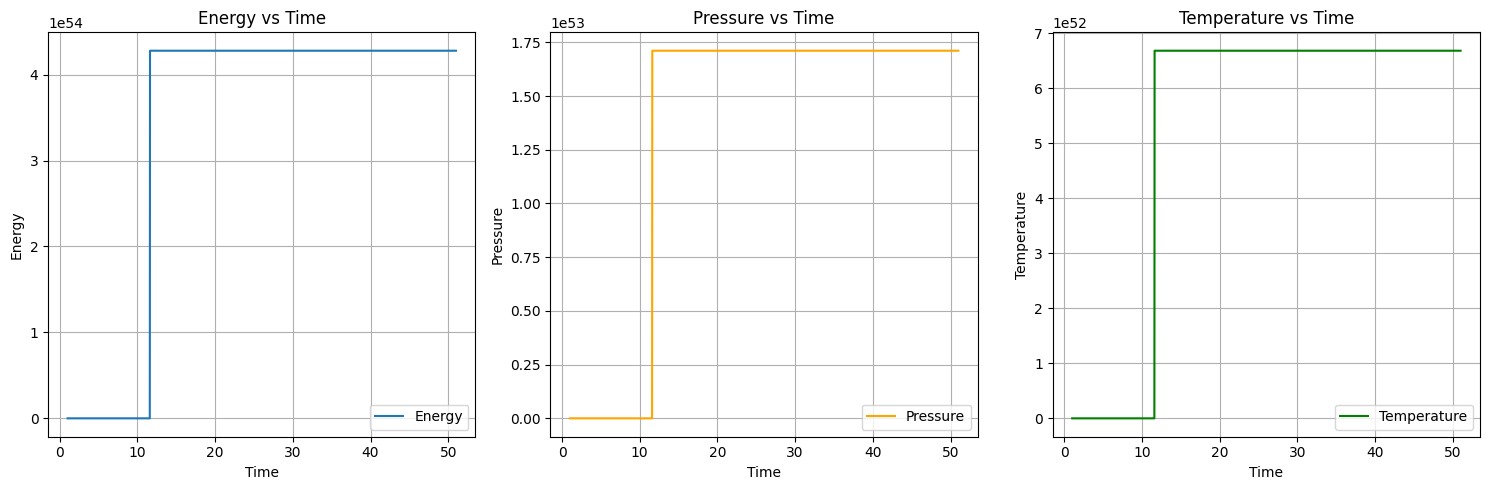

In [13]:
# Extract simulation history
time_history = sim.time_history
energy_history = sim.total_energy_history
pressure_history = sim.pressure_history
temperature_history = sim.temperature_history

# Plot the graphs
plt.figure(figsize=(15, 5))

# Energy plot
plt.subplot(1, 3, 1)
plt.plot(time_history, energy_history, label='Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.grid()
plt.legend()

# Pressure plot
plt.subplot(1, 3, 2)
plt.plot(time_history, pressure_history, label='Pressure', color='orange')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure vs Time')
plt.grid()
plt.legend()

# Temperature plot
plt.subplot(1, 3, 3)
plt.plot(time_history, temperature_history, label='Temperature', color='green')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature vs Time')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

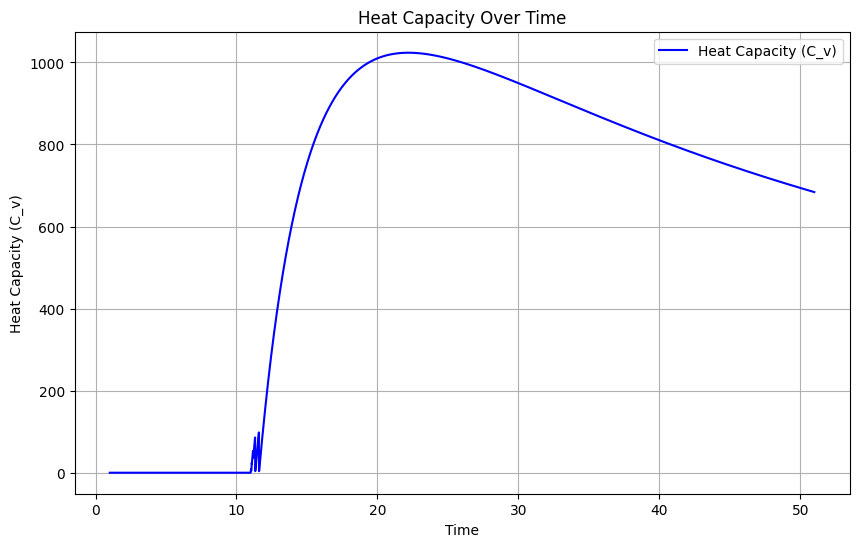

In [14]:
# Calculate heat capacity over time
heat_capacity_history = []
for t in range(len(energy_history)):
    mean_energy_t = np.mean(energy_history[:t+1])
    mean_energy_squared_t = np.mean(np.square(energy_history[:t+1]))
    temperature_t = temperature_history[t]
    temperature_squared_t = temperature_t ** 2

    if temperature_squared_t > 0:  # Avoid division by zero
        C_v_t = (mean_energy_squared_t - mean_energy_t**2) / (k_B * temperature_squared_t)
        heat_capacity_history.append(C_v_t)
    else:
        heat_capacity_history.append(0)

# Plot heat capacity over time
plt.figure(figsize=(10, 6))
plt.plot(time_history, heat_capacity_history, label='Heat Capacity (C_v)', color='blue')
plt.xlabel('Time')
plt.ylabel('Heat Capacity (C_v)')
plt.title('Heat Capacity Over Time')
plt.grid()
plt.legend()
plt.show()